In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
os.chdir('/content/drive/My Drive/DIC ASSIGNMENT 1')
data=pd.read_csv('data.csv')
features=data.iloc[:,0:48]
features=np.asarray(features)
labels=data.iloc[:,48]
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2)

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.preprocessing import scale
from matplotlib.pyplot import matshow
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

DATA NORMALIZATION

In [ ]:
def normalize(features,features_min,features_max):
  features = (features - features_min) / (features_max - features_min)

  return features

In [ ]:
features=np.asarray(features)
labels = np.asarray(labels)
features_train=np.asarray(features_train)
features_test=np.asarray(features_test)
labels_train=np.asarray(labels_train)
labels_test=np.asarray(labels_test)
row=features_train[:1,]

ACCURACY

In [ ]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""


def Accuracy(y_true,y_pred):
  # """
  # :type y_true: numpy.ndarray
  # :type y_pred: numpy.ndarray
  # :rtype: float
  
  # """
  size=y_true.size
  correct_pred = np.sum(y_true == y_pred)
  
  return correct_pred / size

RECALL

In [ ]:
def Recall(y_true,y_pred):
    #  """
    # :type y_true: numpy.ndarray
    # :type y_pred: numpy.ndarray
    # :rtype: float
    # """
  classes=np.unique(y_true)
  size=len(y_pred)
  true_positive=0
  false_negative=0
  recall=0
  for c in classes:
    for i in range(size):
      if y_true[i]==c and y_pred[i]==c:
        true_positive +=1
      if y_true[i]==c and y_pred[i]!=c:
        false_negative +=1
    if (true_positive==0 and false_negative==0):
      recall=0
    else:
      recall+=true_positive/(true_positive+false_negative)
  return recall/len(classes)

PRECISION

In [ ]:
def Precision(y_true,y_pred):
  classes=np.unique(y_true)
  size=len(y_pred)
  true_positive=0
  false_positive=0
  precision=0
  for c in classes:
    for i in range(size):
      if y_true[i]==c and y_pred[i]==c:
        true_positive +=1
      if y_true[i]!=c and y_pred[i]==c:
        false_positive +=1
    if (true_positive==0 and false_positive==0):
      precision=0
    else:
      precision+=true_positive/(true_positive+false_positive)
  return precision/len(classes)

KNN

In [ ]:
def KNN(X_train,X_test,Y_train):
  Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
  Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
  X_train = normalize(X_train,Xmin,Xmax)
  X_test = normalize(X_test,Xmin,Xmax)
  testresult=[]
  k_value=50
  b=0
  testresult_test=[]
  for row in X_test:
    distance=[]
    knn = []
    row=np.asarray(row)
    row=row.reshape(1,48)
    
    # distance=np.sqrt(np.sum(np.subtract(np.tile(row,reps=[32764,1]),X_train),axis=1),axis=1)
    distance=np.sqrt(np.sum(np.square((np.subtract(np.repeat(row,32764,0),X_train))),axis=1))
    distance=distance.reshape(32764,1)
    Y_train=Y_train.reshape(32764,1)
    distance_Y_train=np.concatenate((Y_train,distance),axis=1)
    distance_Y_train =  distance_Y_train[np.argsort(distance_Y_train[:, 1])]    
    knn = distance_Y_train[:k_value]
    knn=knn[:,0]
    knn=knn.astype(int)
    # print(np.bincount(knn).argmax())
    testresult_test=np.append(testresult_test,np.bincount(knn).argmax())
    testresult_test = testresult_test.astype(int)
  return testresult_test
result=KNN(features_train,features_test,labels_train)


In [ ]:
print("Accuracy: "+str(Accuracy(labels_test,result)))
print("Precision: "+str(Precision(labels_test,result)))
print("Recall: "+str(Recall(labels_test,result)))

Accuracy: 0.97607421875
Precision: 0.9725450631170584
Recall: 0.9722035318745356


WCSS

In [ ]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    wcss_sum = 0
    for i in range(len(Clusters)):
        center = np.mean(Clusters[i],axis = 0)
        dist = np.linalg.norm(Clusters[i] - center, axis = 1)
        dist = dist ** 2

        dist = np.sum(dist)
        
        wcss_sum += dist
    
    return wcss_sum

RANDOM FOREST

In [ ]:
def gini_number(data):
  classes=np.unique(data[:,-1]) 
  size=len(data)
  score=0
  for class_values in classes:
    score =score + np.square(np.count_nonzero(data[:,-1]== class_values)/size)
  gini=1-score
  return gini


def information_gain(dataset):
  percent=[10,20,30,40,50,60,70,80,90]
  i=-1
  gain=-9999
  left_data= None
  right_data= None
  new=[]
  datafeatures=dataset[:,0:dataset.shape[1]-1]
  left_gini,right_gini=0,0
  for column in datafeatures.T:

    i+=1

    n_instances=float(len(dataset))
    if(n_instances<=1):
      continue
    gini_column=gini_number(dataset[:,[i,-1]])
    for percentile in percent:
      
      
      new=np.argsort(dataset[:,i])
      split=np.percentile(dataset[:,i],percentile)
      left=dataset[dataset[:,i]<split]
      left_size=float(len(left))
      right=dataset[dataset[:,i]>=split]
      right_size=float(len(right))
      left_gini=gini_number(left)
      right_gini=gini_number(right)
      weighted_gini=left_gini*(left_size/n_instances)+right_gini*(right_size/n_instances)
      info_gain=gini_column-weighted_gini
      if(info_gain>gain):
        gain,left_data,right_data,index_column,value=info_gain,left,right,i,split
  return {'gain':gain,'left':left_data,'right':right_data,'index':index_column,'value':value}

def splitting(node,max_depth):

  depth=10
  minsize=2   
  left=node['left']
  right=node['right']
  del(node['left'])
  del(node['right'])
  left_label=left[:,-1]
  left_label=left_label.astype(int)
  right_label=right[:,-1]
  right_label=right_label.astype(int)
  values=[]
  if(len(left)==0 or len(right)==0):
    values=np.concatenate((left,right))
    vl=values[:,-1].astype(int)
    final_label=np.bincount(vl).argmax()
    node['left']=node['right']=final_label
    return
  if(max_depth>=depth):
    node['left']=np.bincount(left_label).argmax()
    node['right']=np.bincount(right_label).argmax()
    return
  if(minsize>=len(left)):
    node['left']=np.bincount(left_label).argmax()
  else:
    node['left']=information_gain(left)
    d=max_depth+1
    splitting(node['left'],d)
  if(minsize>=len(right)):
    node['right']=np.bincount(right_label).argmax()
  else:
    node['right']=information_gain(right)
    d=max_depth+1
    splitting(node['right'],d)


def predictions(root,row):
  if (row[root['index']]>root['value']):
    if isinstance(root['right'],dict):
      pred_val=predictions(root['right'],row)
    else:
      pred_val=root['right']
  else:
    if isinstance(root['left'],dict):
      pred_val=predictions(root['left'],row)
    else:
      pred_val=root['left']
  return pred_val


def decision_tree(data,test):
  
  node=information_gain(data)
  splitting(node,1)
  test_predictions=[]
  for row in test:
    predicted=predictions(node,row)
    test_predictions=np.append(test_predictions,predicted)
  return test_predictions


In [ ]:
def RandomForest(X_train,Y_train,X_test):
    # """
    # :type X_train: numpy.ndarray
    # :type X_test: numpy.ndarray
    # :type Y_train: numpy.ndarray
    
    # :rtype: numpy.ndarray
    # """
  Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
  Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
  X_train = normalize(X_train,Xmin,Xmax)
  X_test = normalize(X_test,Xmin,Xmax)

  epochs=10
  total_predictions=[]
  predicted_label=[]
  for i in range(epochs):
    features_for_split=np.sqrt(np.size(X_train,1)) #7 features
    index=np.arange(X_train.shape[1])
    random_sample=np.random.choice(index,size=features_for_split.astype(int),replace=True)
    random_features=features_train[:,random_sample]
    test_features=X_test[:,random_sample]
    total_data=np.column_stack((random_features,Y_train))
    index_bootstrap=np.arange(X_train.shape[0])
    bootstrap_sample=np.random.choice(index_bootstrap,X_train.shape[0],replace=True)
    
    bootstrap_data=total_data[bootstrap_sample,:]
    total_predictions=np.append(total_predictions,decision_tree(bootstrap_data,test_features))
  total_predictions=total_predictions.reshape(epochs,X_test.shape[0])
  total_predictions=total_predictions.astype(int)
  for row in total_predictions.T:
    predicted_label=np.append(predicted_label,np.bincount(row).argmax())
  return predicted_label
  
  
labels_predict=RandomForest(features_train,labels_train,features_test)
  


In [ ]:
print("Accuracy: "+str(Accuracy(labels_test,labels_predict)))
print("Precision: "+str(Precision(labels_test,labels_predict)))
print("Recall: "+str(Recall(labels_test,labels_predict)))

Accuracy: 0.937255859375
Precision: 0.9006695769117544
Recall: 0.9514022275181261


PCA

In [ ]:
def PCA(X_train,N):
    # """
    # :type X_train: numpy.ndarray
    # :type N: int
    # :rtype: numpy.ndarray
    # """
    mean_Val = np.mean(X_train)
    X_train_mean=X_train-mean_Val
    u,s,vh = np.linalg.svd(X_train_mean, full_matrices=False)
    vh=vh.T
    S=np.diag(s)
    PCA_array = u[:, 0:N].dot(S[0:N, 0:N])
    return PCA_array

In [ ]:
PCA(features_train,5)

array([[-1.83740211,  1.11701008, -0.0258484 ,  0.07100412,  0.03270794],
       [-1.63006909, -0.3063768 , -0.1313486 , -0.13376947, -0.1742998 ],
       [-1.62225213, -0.45322299, -0.02203886, -0.06055087, -0.14343824],
       ...,
       [-1.75573997, -0.55979788,  0.40984929,  0.14038242, -0.02592349],
       [-1.77257977, -0.56674086,  0.44536528,  0.10578653, -0.06077341],
       [-1.6145492 , -0.4666827 ,  0.01172564, -0.15199735, -0.20391999]])

K-MEANS

In [ ]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
    Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
    X_train = normalize(X_train,Xmin,Xmax)
    
    num_rows = X_train.shape[0]
    indexes = np.random.choice(num_rows, size=N, replace=False)
    
    centers = X_train[indexes, :]
    centers_prev = np.zeros(centers.shape)

    while(not np.array_equal(centers,centers_prev)):
        cluster_distance = np.zeros((N, len(X_train)))
        centers_prev = np.copy(centers)
        for i in range(len(centers)):
            c = centers[i].reshape(1,len(centers[0]))
            #cluster_distance[i,:] = np.sqrt(np.sum(((X_train - c) ** 2),axis = 1))
            cluster_distance[i,:] = np.linalg.norm(X_train - c, axis = 1)
        min_index = np.argmin(cluster_distance,axis=0)

        for i in range(len(centers)):
            centers[i] = np.mean(X_train[np.where(min_index == i)],axis = 0)
      
    min_index = min_index + 1
    clusters = []
    for i in range(N):
      clusters.append(X_train[list(np.where(min_index == i+1)[0])])

    return clusters

In [ ]:
clusters = Kmeans(features,3)
print(WCSS(clusters))

3
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
10876.415023001844


PART-2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

CONFUSION MATRIX AND VISUALIZATION

In [ ]:
def plot_confusion_matrix(cm,title='Confusion matrix'):    
    Color=plt.cm.Reds
    fig = plt.figure(figsize=(12,8))
    sub = fig.add_subplot(111)
    plot = sub.matshow(cm,cmap=Color)
    plt.title(title)
    fig.colorbar(plot)
    sub.xaxis.set_major_locator(ticker.MultipleLocator(1))
    sub.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [ ]:
def ConfusionMatrix(y_true,y_pred,title='Confusion matrix'):
    # """
    # :type y_true: numpy.ndarray
    # :type y_pred: numpy.ndarray
    # :rtype: float
    # """
  unique_val=np.unique(y_true)
  no_class = len(unique_val)
  y_true=y_true-1
  y_pred=y_pred-1

  confusion_matrix=y_true*no_class+y_pred
  con_matrix= np.zeros(no_class**2)
  for i in range(len(confusion_matrix)): 
    index=confusion_matrix[i]
    count=np.count_nonzero(confusion_matrix==(index))
    con_matrix[index]=count

  con_matrix_reshape=np.reshape(con_matrix, (no_class,no_class))
  plot_confusion_matrix(con_matrix_reshape,title)
  return con_matrix_reshape

SUPERVISED LEARNING-LOGISTIC REGRESSION,KNN,DECISION TREE,SVM

In [ ]:
def MyLogisticRegression(X_train,Y_train): #85.8% 
    logistic_regr = LogisticRegression(multi_class = 'multinomial', solver = 'saga')
    logistic_regr.fit(X_train,Y_train)
    return logistic_regr
    
def MyKNNClassifier(X_train,Y_train): #98.4%
    knn = KNeighborsClassifier(n_neighbors = 11, weights='uniform')
    knn.fit(X_train,Y_train)
    return knn

def MyDTClassifier(X_train,Y_train): #98.2%
    classifier = tree.DecisionTreeClassifier()
    classifier = classifier.fit(X_train,Y_train)
    return classifier

def MySVClassifier(X_train,Y_train): #90.1%
    svclassifier = SVC(kernel = 'linear')
    svclassifier.fit(X_train,Y_train)
    return svclassifier

In [ ]:
def SklearnSupervisedLearning(X_train,Y_train,X_test,Y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
    Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
    X_train = normalize(X_train,Xmin,Xmax)
    X_test = normalize(X_test,Xmin,Xmax)

    classifier = MyLogisticRegression(X_train,Y_train)
    log_regr_y_pred = classifier.predict(X_test)
    print("Accuracy of Logistic Regression: "+str(Accuracy(Y_test,log_regr_y_pred)))
    ConfusionMatrix(Y_test,log_regr_y_pred,"Confusion matrix of Logistic Regression")

    classifier = MySVClassifier(X_train,Y_train)
    svm_y_pred = classifier.predict(X_test)
    print("Accuracy of SVM: "+str(Accuracy(Y_test,svm_y_pred)))
    ConfusionMatrix(Y_test,svm_y_pred,"Confusion matrix of SVM")

    classifier = MyKNNClassifier(X_train,Y_train)
    knn_y_pred = classifier.predict(X_test)
    print("Accuracy of KNN: "+str(Accuracy(Y_test,knn_y_pred)))
    ConfusionMatrix(Y_test,knn_y_pred,"Confusion matrix of KNN")

    classifier = MyDTClassifier(X_train,Y_train)
    DT_y_pred = classifier.predict(X_test)
    print("Accuracy of Decision Tree: "+str(Accuracy(Y_test,DT_y_pred)))
    ConfusionMatrix(Y_test,DT_y_pred,"Confusion matrix of Decision Tree")

    return [log_regr_y_pred,svm_y_pred,knn_y_pred,DT_y_pred]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of Logistic Regression: 0.8702392578125
Accuracy of SVM: 0.8919677734375
Accuracy of KNN: 0.98583984375
Accuracy of Decision Tree: 0.9803466796875


[array([10,  8,  7, ...,  1, 11,  8]),
 array([10,  8,  7, ...,  1, 11,  8]),
 array([10,  8,  7, ...,  1, 11,  8]),
 array([10,  8,  7, ...,  1, 11,  8])]

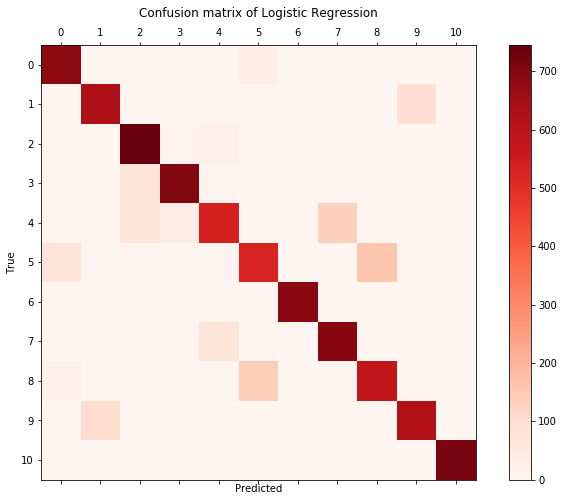

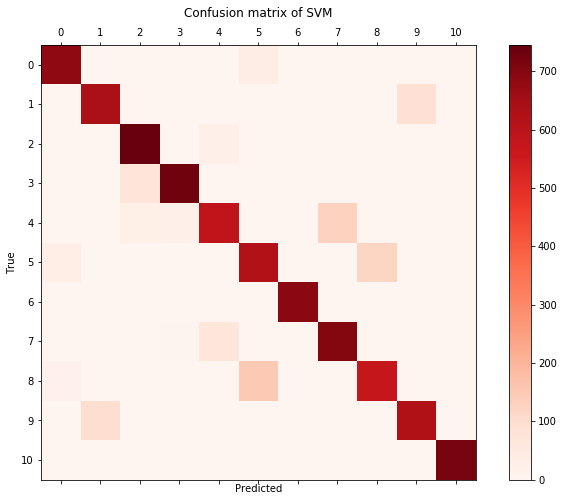

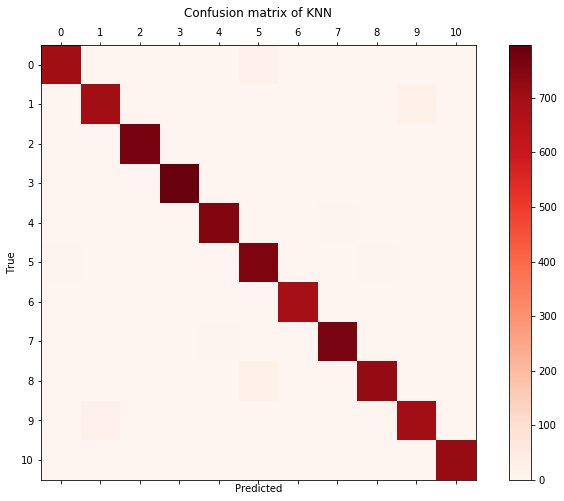

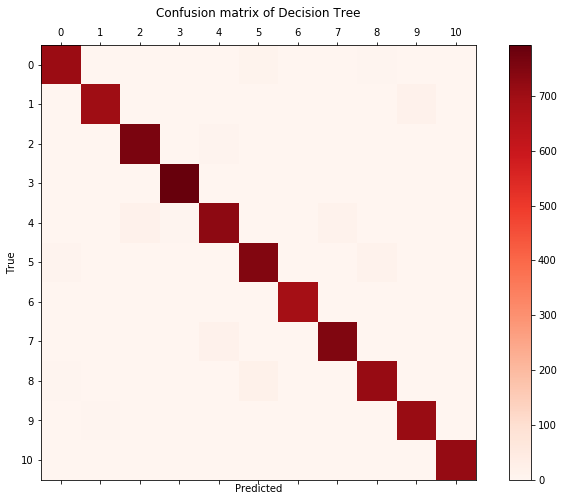

In [ ]:
SklearnSupervisedLearning(features_train,labels_train,features_test,labels_test)

VOTING CLASSIFIER

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of Voting Classifier: 0.94677734375


'\nCreate your own custom functions for Matplotlib visualization of hyperparameter search. \nMake sure that plots are labeled and proper legends are used\n'

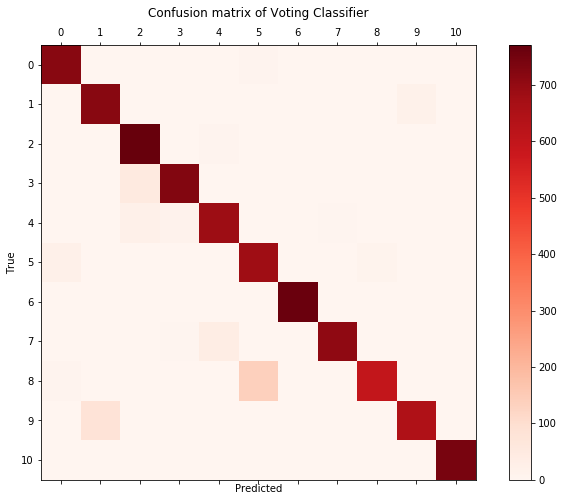

In [ ]:
def SklearnVotingClassifier(X_train,Y_train,X_test,Y_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
    Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
    X_train = normalize(X_train,Xmin,Xmax)
    X_test = normalize(X_test,Xmin,Xmax)
    
    logistic_regr = MyLogisticRegression(X_train,Y_train)
    knn = MyKNNClassifier(X_train,Y_train)
    svclassifier = MySVClassifier(X_train,Y_train)
    DTclassifier = MyDTClassifier(X_train,Y_train)
    
    models = [('logisitc_regr',logistic_regr),('knn',knn),('svclassifier',svclassifier),('DecisionTree',DTclassifier)]
    ensemble = VotingClassifier(models,voting = 'hard')
    ensemble.fit(X_train,Y_train)
    y_pred = ensemble.predict(X_test)
    ConfusionMatrix(Y_test,y_pred,"Confusion matrix of Voting Classifier")
    print("Accuracy of Voting Classifier: "+str(Accuracy(Y_test,y_pred)))
    return y_pred
SklearnVotingClassifier(features_train,labels_train,features_test,labels_test)

"""
Create your own custom functions for Matplotlib visualization of hyperparameter search. 
Make sure that plots are labeled and proper legends are used
"""

KNN GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

[5, 6, 11, 5, 6, 11]


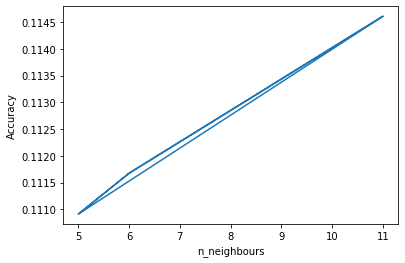

In [ ]:

def KNeighboursClassifier_grid(features_train,features_test,labels_train,labels_test):
  knn_grid = KNeighborsClassifier()
  knn_grid_dict={'n_neighbors':[5,6,11],
                'algorithm':['auto','ball_tree']}
  knn_grid_search = GridSearchCV(estimator=knn_grid,
                      param_grid=knn_grid_dict,
                      scoring='accuracy',
                      )
  knn_grid_search.fit(features_train,labels_train)
  Y_predict=knn_grid_search.predict(features_test)
  params = knn_grid_search.cv_results_['params']
  num_neighbors = []
  for p in params:
    num_neighbors.append(p['n_neighbors'])
  print(num_neighbors)
  KNN_Accuracy=pd.DataFrame(knn_grid_search.cv_results_,columns=['mean_test_score'])
  plt.plot(num_neighbors,KNN_Accuracy)
  plt.xlabel('n_neighbours')
  plt.ylabel('Accuracy')

  plt.show
KNeighboursClassifier_grid(features_train,features_test,labels_train,labels_test)

DECISION TREE GRID SEARCH

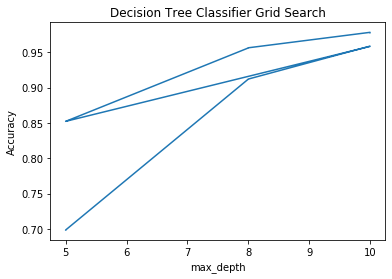

In [ ]:
def Decision_tree_Classifier_grid(features_train,features_test,labels_train,labels_test):
  classifier_grid= tree.DecisionTreeClassifier()
  decision_tree_dict={'max_depth':[5,8,10],
                'criterion':['gini','entropy'],
                'min_samples_split':[2,4]}
  decision_tree_search = GridSearchCV(estimator=classifier_grid,
                      param_grid=decision_tree_dict,
                      scoring='accuracy',
                      )
  decision_tree_search.fit(features_train,labels_train)
  Y_predict_decision=decision_tree_search.predict(features_test)
  # print("Accuracy :"+ Accuracy(labels_test,Y_predict))

  params = decision_tree_search.cv_results_['params']
  max_depth = []
  for p in params:
    max_depth.append(p['max_depth'])
  Decision_Accuracy=pd.DataFrame(decision_tree_search.cv_results_,columns=['mean_test_score'])
  plt.plot(max_depth,Decision_Accuracy)
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.title("Decision Tree Classifier Grid Search")
  plt.show
Decision_tree_Classifier_grid(features_train,features_test,labels_train,labels_test)

SVM GRID SEARCH

In [ ]:
def SVClassifier_grid(X_train,X_test,Y_train,Y_test):
  Xmin = np.amin(X_train,axis=0).reshape(1,X_train.shape[1])
  Xmax = np.amax(X_train,axis=0).reshape(1,X_train.shape[1])
  X_train = normalize(X_train,Xmin,Xmax)
  X_test = normalize(X_test,Xmin,Xmax)

  svclassifier_grid = SVC()
  svm_dict={'gamma':['scale','auto'],
                'degree':[1,4,5],
                'kernel':['linear']}
  svm_search = GridSearchCV(estimator=svclassifier_grid,
                      param_grid=svm_dict,
                      scoring='accuracy',
                      )
  svm_search.fit(X_train,Y_train)
  Y_predict_svm=svm_search.predict(X_test)
  params = svm_search.cv_results_['params']
  degree = []
  for p in params:
    degree.append(p['degree'])
  SVM_Accuracy=pd.DataFrame(svm_search.cv_results_,columns=['mean_test_score'])
  plt.plot(degree,SVM_Accuracy)
  plt.xlabel('degree')
  plt.ylabel('Accuracy')
  plt.title("SVM Classifier Grid Search")
  plt.show
SVClassifier_grid(features_train,features_test,labels_train,labels_test)

LOGISTIC REGRESSION GRID SEARCH

In [ ]:
def Logistic_Regression_grid(features_train,features_test,labels_train,labels_test):
  logistic_regr_grid = LogisticRegression()
  logistic_dict={'solver': ['newton-cg', 'lbfgs','sag', 'saga'],
                  'multi_class':['multinomial']}
  logistic_search = GridSearchCV(estimator=logistic_regr_grid,
                      param_grid=logistic_dict,
                      scoring='accuracy',
                      )
  logistic_search.fit(features_train,labels_train)
  Y_predict_logistic=logistic_search.predict(features_test)
  # print("Accuracy :"+ Accuracy(labels_test,Y_predict))
  print(logistic_search.cv_results_)
  params = logistic_search.cv_results_['params']
  solver = []
  for p in params:
    solver.append(p['solver'])
  logistic_Accuracy=pd.DataFrame(logistic_search.cv_results_,columns=['mean_test_score'])
  plt.plot(solver,logistic_Accuracy)
  plt.xlabel('solver')
  plt.ylabel('Accuracy')
  plt.title('Logistic regression Grid Search')
  plt.show
Logistic_Regression_grid(features_train,features_test,labels_train,labels_test)